<a href="https://colab.research.google.com/github/NotYael/book-classifier-ml/blob/main/180_Final_Project_Martinez%2C_Dela_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Modules and Data**

In [ ]:
%pip install scikit-plot
%pip install scipy==1.7.3

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.3.0
    Uninstalling contourpy-1.3.0:
      Successfully uninstalled contourpy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.13.6 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


In [ ]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [ ]:
# get csv from drive
path = 'https://drive.google.com/file/d/1lzegauMXZQDesg7BPKRI2FiBzzZjv1YP/view?usp=sharing'
path = 'https://drive.google.com/uc?id=' + path.split('/')[-2]
books = pd.read_csv(path, sep = ",").set_index('index')

# **Data Exploration**

In [ ]:
# examine the first few rows of data
books.head(10)

,title,genre,summary
index,,,
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
5,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...
6,The Thief,fantasy,"Gen is released from prison by the magus, the..."
7,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...
8,Mistborn: The Final Empire,fantasy,"In Luthadel, the capital city of the Final Em..."


In [ ]:
# check num of rows and cols
books.shape

(4657, 3)

In [ ]:
# check for null values
books.isnull().sum()

,0
title,0
genre,0
summary,0


In [ ]:
# check number of classes and their distributions
books['genre'].value_counts()

,count
genre,
thriller,1023
fantasy,876
science,647
history,600
horror,600
crime,500
romance,111
psychology,100
sports,100


<Axes: title={'center': 'Genres'}, xlabel='genre'>

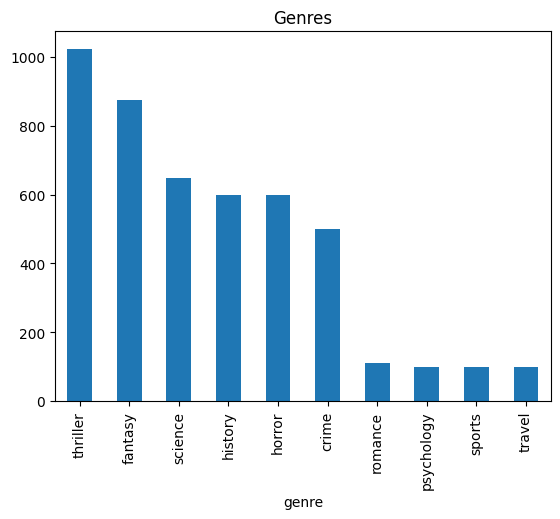

In [ ]:
# plot the distribution as a bar chart for easier visualization
books['genre'].value_counts().plot(kind = 'bar', title = 'Genres')

We see that there is a noticeable imbalance in the data. We'll have to make sure to include samples of the minorities in all of the sets after splitting later.

# **Pre-Processing**

*Remove Non-English Entries*

In [ ]:
books.shape

(4657, 3)

In [ ]:
!pip install langid

In [ ]:
from langid import classify

# Language Identification function
def identify_language(text):
    lang, _ = classify(text)
    return lang

# Applying the function to the dataset
books['language'] = books['summary'].apply(identify_language)

books.sample(10)

,title,genre,summary,language
index,,,,
198,Chocolat,fantasy,"The story begins as two strangers, Vianne Roc...",en
3804,Personal,thriller,"You can leave the army, but the army doesn’t l...",en
1642,Iceland's Bell,history,The first part tells the story of Jón Hreggvi...,en
1054,Disordered Minds,crime,"In 1970 Harold Stump, a mentally challenged y...",en
819,Pattern Recognition,science,"Advertising consultant Cayce Pollard, who rea...",en
4576,Alice's Adventures in Wonderland,fantasy,Chris Riddell's brilliant new full-colour illu...,en
2273,The Dark Cry of the Moon,horror,The novel concerns werewolves in the Connecti...,en
1477,Orange Crush,crime,"Marlon Conrad, a spoiled ""rich kid"", enters t...",en
499,Troll Fell,fantasy,Troll Fell tells the story of young Peer Ulfs...,en


In [ ]:
# remove non-english entries
for i in range(0, len(books['language'])):
  if books['language'][i] != ('en'):
      books.drop(i, inplace = True)

In [ ]:
# check new book count
books.shape

(4636, 4)

In [ ]:
books = books.reset_index(drop=True)

*Add labels for training and testing*

In [ ]:
# convert genre strings to numerical data in a new label column
from sklearn.preprocessing import LabelEncoder
books['label'] = LabelEncoder().fit_transform(books['genre'])
books.sample(10)

,title,genre,summary,language,label
778,Our Friends from Frolix 8,science,"In the 22nd Century, the Earth is ruled by th...",en,6
2760,Cross,thriller,Alex Cross narrates the opening section of th...,en,8
3403,A Brief History of Time,science,In the ten years since its publication in 1988...,en,6
210,Crossroads of Twilight,fantasy,Perrin Aybara continues trying to rescue his ...,en,1
4054,Sister,thriller,Nothing can break the bond between sisters ......,en,8
4483,Dracula,fantasy,You can find an alternative cover edition for ...,en,1
3158,Nothing But Blackened Teeth,horror,Cassandra Khaw's Nothing But Blackened Teeth i...,en,3
514,Icarus at the Edge of Time,science,The book is a science fiction retelling of Ic...,en,6
3384,Memoirs of a Geisha,romance,"A literary sensation and runaway bestseller, t...",en,5
2709,The Fear,thriller,The Fear begins 5 days before Small Sam and T...,en,8


*Remove stopwords, special characters, and turning chars to lower-case*

In [ ]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download("stopwords")

# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def preprocessing(total_text):
    if type(total_text) is not int:
        strings = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()

        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                strings += word + " "

        return strings

#text processing stage.
books["summary"] = books["summary"].apply(preprocessing)

# Checking data after pre-processing
books.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,genre,summary,language,label
2385,Spike and Dru: Pretty Maids All in a Row,horror,1940 drusilla vampiric birthday spike decides ...,en,3
4236,Blood River: A Journey to Africa's Broken Heart,travel,compulsively readable account journey congo co...,en,9
1162,The Secret of Chimneys,crime,seven years previously balkan state herzoslova...,en,0
732,Settling Accounts: Drive to the East,science,title suggests involves world version invasion...,en,6
1184,Simisola,crime,dr raymond akande wexford new gp one black bri...,en,0


In [ ]:
# get genres and their corresponding labels in numeric form
genre_label = {books['genre'][x]: books['label'][x] for x in range(len(books))}
dict(sorted(genre_label.items(), key=lambda x: x[1])) # sort based on labels

{'crime': 0,
 'fantasy': 1,
 'history': 2,
 'horror': 3,
 'psychology': 4,
 'romance': 5,
 'science': 6,
 'sports': 7,
 'thriller': 8,
 'travel': 9}

In [ ]:
# check if label count is correct
books['label'].value_counts()

,count
label,
8,1014
1,875
6,642
2,599
3,598
0,499
5,111
7,100
9,100


*Splitting the data set*

In [ ]:
# define X and y
X = books.summary
y = books.label

In [ ]:
# split X and y into training, validation, and testing sets
# use stratifiedshufflesplit for imbalanced data sets
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) # 20% test set
for train_val_index, test_index in sss.split(X, y):
    X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
    y_train_val, y_test = y.iloc[train_val_index], y.iloc[test_index]

sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=0) # 10% validation set, 70% training set
for train_index, val_index in sss_val.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

Our data is now divided such that 70% is part of the training set, 10% is part of the validation set, and the remaining 20% is for testing.

# Vectorization

In [ ]:
# use CountVectorizer for tokenization and further pre-processing
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range = (1, 1), min_df = 0.001, max_df = 0.3, max_features = 14000)

We hand-tuned the parameters for this vectorizer as well as for the models that you will see later. We simply adjusted each parameter one by one until we reached relatively decent metrics.

In [ ]:
# fit and transform training data
X_train_dtm = vect.fit_transform(X_train)

In [ ]:
# transform validation data
X_val_dtm = vect.transform(X_val)

In [ ]:
# transform test data
X_test_dtm = vect.transform(X_test)

# Modelling and Tuning

*Random Forest Classifier*

In [ ]:
# import and instantiate a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# add hand-tuned hyper-parameters
rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced', n_estimators = 2000, max_depth = 100, min_samples_leaf = 2, max_features = 10)

In [ ]:
from sklearn import metrics

# train the model
rf.fit(X_train_dtm, y_train)

# make predictions for both training and validation data for checking
y_train_pred = rf.predict(X_train_dtm)
y_val_pred = rf.predict(X_val_dtm)

# get training accuracy
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy)

# get validation accuracy
val_accuracy = metrics.accuracy_score(y_val, y_val_pred)
print("Accuracy on Val Set:", val_accuracy)

Accuracy on Train Set: 0.9226263871763255
Accuracy on Val Set: 0.7068965517241379


Note that accuracy is not that reliable of a metric when it comes to imbalanced data. Thus, we will also plot a confusion matrix as well a classification report to have more reliable metrics such as f1-score and recall.

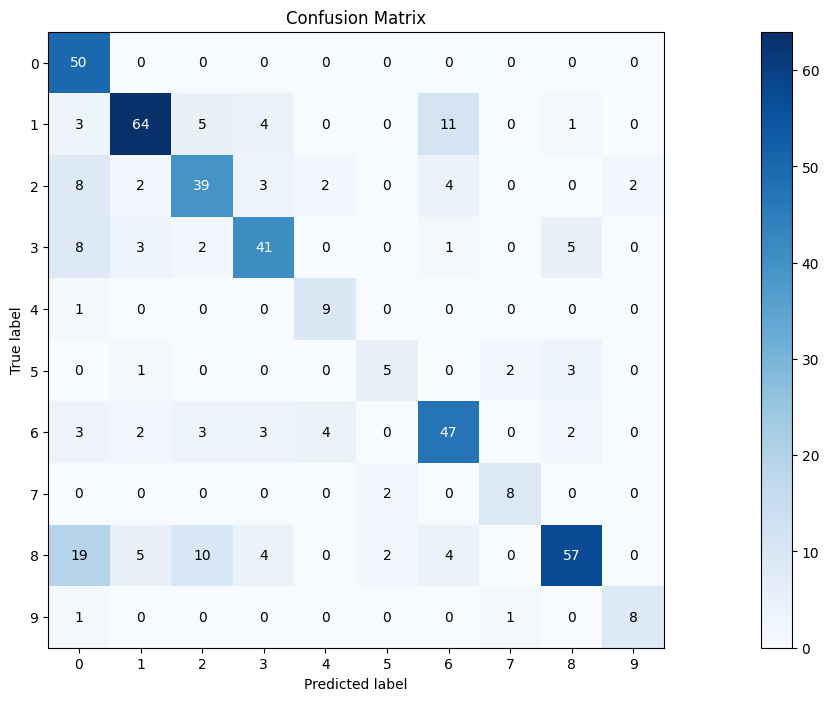

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

# plot confusion matrix for better visualization
fig, ax = plt.subplots(figsize = (25,  8))
ax1 = plot_confusion_matrix(y_val, y_val_pred, ax = ax, cmap = 'Blues')

In [ ]:
from sklearn.metrics import classification_report

# add classification report as an addition to accuracy metric
print(classification_report(y_val, y_val_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.5376    1.0000    0.6993        50
           1     0.8312    0.7273    0.7758        88
           2     0.6610    0.6500    0.6555        60
           3     0.7455    0.6833    0.7130        60
           4     0.6000    0.9000    0.7200        10
           5     0.5556    0.4545    0.5000        11
           6     0.7015    0.7344    0.7176        64
           7     0.7273    0.8000    0.7619        10
           8     0.8382    0.5644    0.6746       101
           9     0.8000    0.8000    0.8000        10

    accuracy                         0.7069       464
   macro avg     0.6998    0.7314    0.7018       464
weighted avg     0.7357    0.7069    0.7063       464



We see from the confusion matrix that the model is actually having trouble with both the romance (5) and the thriller (8) genres even after hyperparameter tuning. A good chunk of the thriller genre, especially, is being predicted as either crime (0) or history (2).

*Multinomial Naive Bayes*

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# add hand-tuned hyper-parameters
nb = MultinomialNB(alpha = 0.1, fit_prior = True)

In [ ]:
# train the model
nb.fit(X_train_dtm, y_train)

# make predictions for both training and validation data for checking
y_train_pred2 = nb.predict(X_train_dtm)
y_val_pred2 = nb.predict(X_val_dtm)

# get training accuracy
train_accuracy = metrics.accuracy_score(y_train, y_train_pred2)
print("Accuracy on Train Set:", train_accuracy)

# get validation accuracy
val_accuracy = metrics.accuracy_score(y_val, y_val_pred2)
print("Accuracy on Val Set:", val_accuracy)

Accuracy on Train Set: 0.9429716399506781
Accuracy on Val Set: 0.7068965517241379


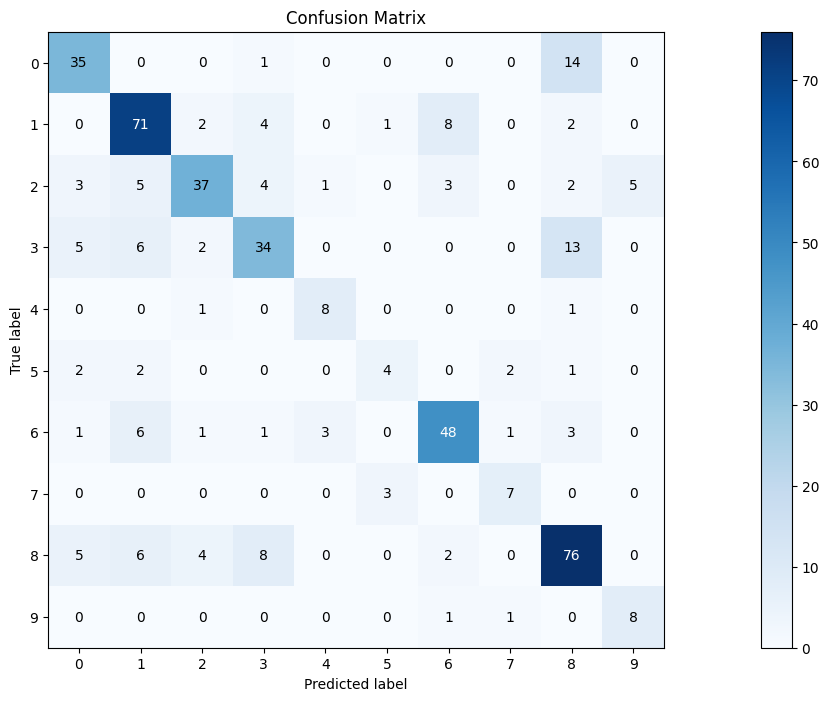

In [ ]:
# plot confusion matrix for better visualization
fig, ax = plt.subplots(figsize = (25,  8))
ax1 = plot_confusion_matrix(y_val, y_val_pred2, ax = ax, cmap = 'Blues')

In [ ]:
# add classification report as an addition to accuracy metric
print(classification_report(y_val, y_val_pred2, digits = 4))

              precision    recall  f1-score   support

           0     0.6863    0.7000    0.6931        50
           1     0.7396    0.8068    0.7717        88
           2     0.7872    0.6167    0.6916        60
           3     0.6538    0.5667    0.6071        60
           4     0.6667    0.8000    0.7273        10
           5     0.5000    0.3636    0.4211        11
           6     0.7742    0.7500    0.7619        64
           7     0.6364    0.7000    0.6667        10
           8     0.6786    0.7525    0.7136       101
           9     0.6154    0.8000    0.6957        10

    accuracy                         0.7069       464
   macro avg     0.6738    0.6856    0.6750       464
weighted avg     0.7083    0.7069    0.7044       464



The naive bayes model, despite still misclassfying a lot of the romance genre, is now better at predicting the thriller genre. However, a noticeable amount of crime (0) and horror (3) genres are also being predicted as thriller (8) too.

# Testing

*Random Forest Classifier*

In [ ]:
rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced', n_estimators = 2000, max_depth = 100, min_samples_leaf = 2, max_features = 10)
rf.fit(X_train_dtm, y_train)

# make predictions for test data with tuned model parameters
y_test_pred = rf.predict(X_test_dtm)

# get test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

Accuracy on Test Set: 0.6831896551724138


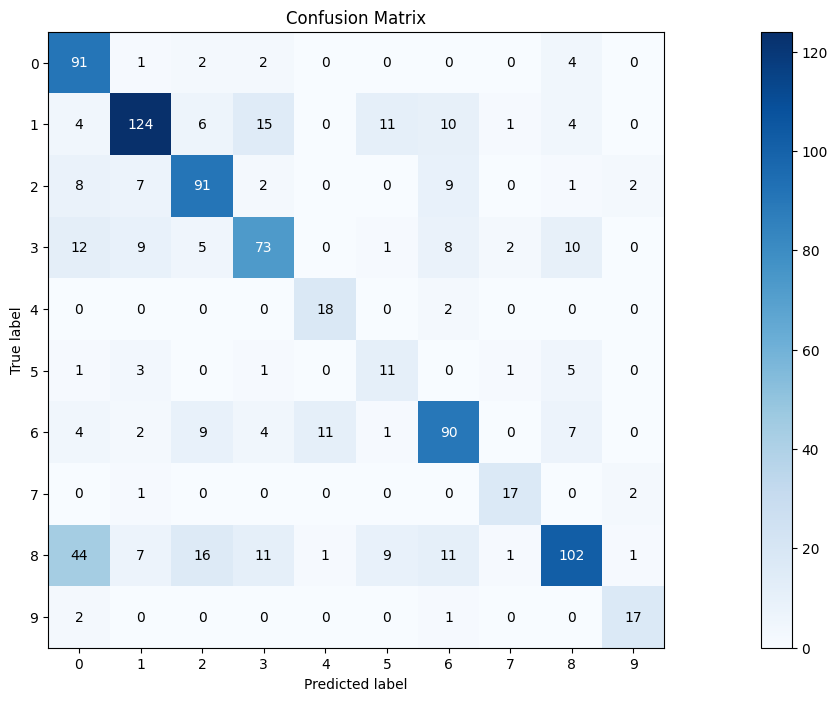

In [ ]:
# plot confusion matrix for better visualization
fig, ax = plt.subplots(figsize = (25,  8))
ax1 = plot_confusion_matrix(y_test, y_test_pred, ax = ax, cmap = 'Blues')

In [ ]:
# add classification report as an addition to accuracy metric
print(classification_report(y_test, y_test_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.5482    0.9100    0.6842       100
           1     0.8052    0.7086    0.7538       175
           2     0.7054    0.7583    0.7309       120
           3     0.6759    0.6083    0.6404       120
           4     0.6000    0.9000    0.7200        20
           5     0.3333    0.5000    0.4000        22
           6     0.6870    0.7031    0.6950       128
           7     0.7727    0.8500    0.8095        20
           8     0.7669    0.5025    0.6071       203
           9     0.7727    0.8500    0.8095        20

    accuracy                         0.6832       928
   macro avg     0.6667    0.7291    0.6850       928
weighted avg     0.7062    0.6832    0.6818       928



*Multinomial Naive Bayes*

In [ ]:
nb = MultinomialNB(alpha = 0.1, fit_prior = True)
nb.fit(X_train_dtm, y_train)

# make predictions for test data with tuned model parameters
y_test_pred2 = nb.predict(X_test_dtm)

# get test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_test_pred2)
print("Accuracy on Test Set:", test_accuracy)

Accuracy on Test Set: 0.6939655172413793


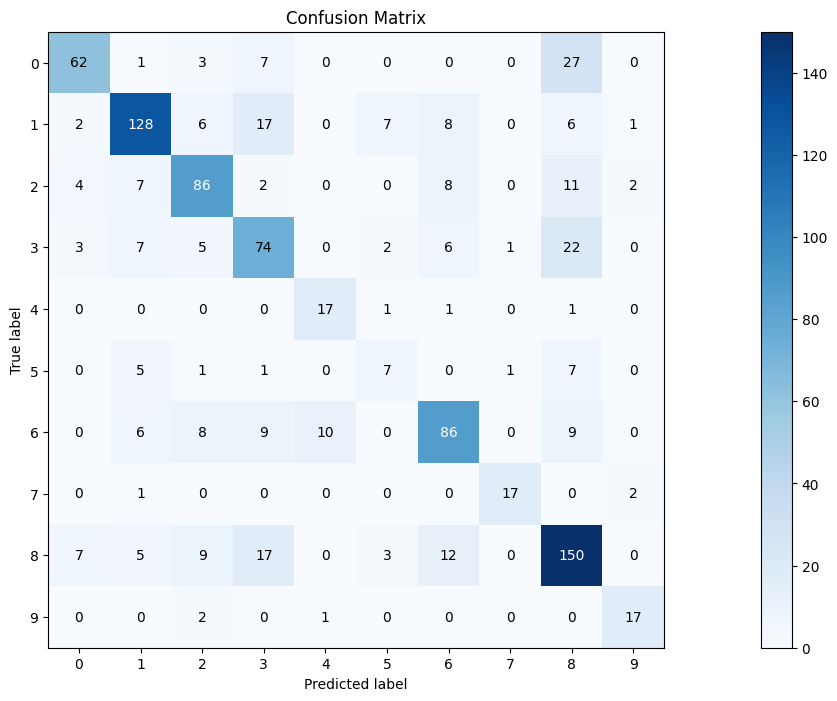

In [ ]:
# plot confusion matrix for better visualization
fig, ax = plt.subplots(figsize = (25,  8))
ax1 = plot_confusion_matrix(y_test, y_test_pred2, ax = ax, cmap = 'Blues')

In [ ]:
# add classification report as an addition to accuracy metric
print(classification_report(y_test, y_test_pred2, digits = 4))

              precision    recall  f1-score   support

           0     0.7949    0.6200    0.6966       100
           1     0.8000    0.7314    0.7642       175
           2     0.7167    0.7167    0.7167       120
           3     0.5827    0.6167    0.5992       120
           4     0.6071    0.8500    0.7083        20
           5     0.3500    0.3182    0.3333        22
           6     0.7107    0.6719    0.6908       128
           7     0.8947    0.8500    0.8718        20
           8     0.6438    0.7389    0.6881       203
           9     0.7727    0.8500    0.8095        20

    accuracy                         0.6940       928
   macro avg     0.6873    0.6964    0.6878       928
weighted avg     0.7007    0.6940    0.6945       928



We see the same trends of misclassifications in the testing stage that we have seen during validation. Unfortunately, the end results are not as promising as we expected, leaving much room for improvement. Perhaps the data itself is not that good for machine learning, given that a lot of the genres (crime, thriller, horror, etc) have overlapping themes. There may also be different preprocessing approaches we could take that could allow us to have significant improvements down the line.

# Demo Code

In [ ]:
import joblib
joblib.dump(vect, 'vectorizer.joblib')
joblib.dump(nb, 'model.joblib')
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [ ]:
# Load the vectorizer and model from disk
import joblib
vect = joblib.load('vectorizer.joblib')
nb_model = joblib.load('model.joblib')
rf_model = joblib.load('rf_model.joblib')

def preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        for word in total_text.split():
            if not word in stop_words:
                string += word + " "
        return string

def classify_book(summary):
    # Identify the language
    lang, _ = classify(summary)
    if lang != 'en':
        return "The summary is not in English."

    # Preprocess the summary
    processed_summary = preprocessing(summary)

    # Vectorize the summary
    summary_dtm = vect.transform([processed_summary])

    # Predict the genre
    predicted_label_nb = nb_model.predict(summary_dtm)
    predicted_label_rf = rf_model.predict(summary_dtm)

    # Map the label back to the genre
    genre_mapping = {0: 'Crime', 1: 'Fantasy', 2: 'History', 3: 'Horror', 4: 'Psychology', 5: 'Romance', 6: 'Science', 7: 'Sports', 8: 'Thriller', 9: 'Travel'}
    predicted_genre_nb = genre_mapping[predicted_label_nb[0]]
    predicted_genre_rf = genre_mapping[predicted_label_rf[0]]

    return predicted_genre_nb, predicted_genre_rf

if __name__ == "__main__":
    book_title = input("Enter the book title: ")
    book_summary = input("Enter the book summary: ")
    genre_nb, genre_rf = classify_book(book_summary)
    print('\n')
    print("Multinomial Naive Bayes")
    print("Predicted genre of " + book_title + " is " + genre_nb)
    print('\n')
    print("Random Forest Classifier")
    print("Predicted genre of " + book_title + " is " + genre_rf)

Enter the book title: a walk in the woods 
Enter the book summary: The Appalachian Trail stretches from Georgia to Maine and covers some of the most breathtaking terrain in America—majestic mountains, silent forests, sparking lakes. If you’re going to take a hike, it’s probably the place to go. And Bill Bryson is surely the most entertaining guide you’ll find. He introduces us to the history and ecology of the trail and to some of the other hardy (or just foolhardy) folks he meets along the way—and a couple of bears. Already a classic, A Walk in the Woods will make you long for the great outdoors (or at least a comfortable chair to sit and read in).


Multinomial Naive Bayes
Predicted genre of a walk in the woods  is Travel


Random Forest Classifier
Predicted genre of a walk in the woods  is Travel
